In [ ]:
# KMEANS

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Agriculture_Manual_Daily_Labour_Wage_In_India_2010_2019.csv")
df.head()

,Centre,Gender,Labour Category,Labour Type,State,District,Wage(INR),Month,Year
0,BUKKAPATINAM,M,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,216.0,Jul,2015
1,BUKKAPATINAM,W,FIELD LABOUR,FIELD LABOUR,ANDHRA PRADESH,ANANTAPUR,150.0,Jul,2015
2,BUKKAPATINAM,M,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
3,BUKKAPATINAM,W,HERDSMEN,HERDSMEN,ANDHRA PRADESH,ANANTAPUR,200.0,Jul,2015
4,BUKKAPATINAM,M,SKILLED \nLABOUR,CARPENTER,ANDHRA PRADESH,ANANTAPUR,300.0,Jul,2015


In [ ]:
X , y = df.drop('Wage(INR)',axis=1) , df[['Wage(INR)']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the non-numerical columns
non_numerical_cols = ['Centre', 'Gender', 'Labour Category', 'State', 'Labour Type']

# Loop through the non-numerical columns and encode them
for col in non_numerical_cols:
    # Create a LabelEncoder object
    encoder = LabelEncoder()

    # Fit the encoder to the unique values in the column
    encoder.fit(df[col].drop_duplicates())

    # Transform the column values using the encoder
    df[col] = encoder.transform(df[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df[['Gender']]
y = df[['Wage(INR)']]

for col in X:
    encoder = LabelEncoder()
    encoder.fit(X[col].drop_duplicates())
    X[col] = encoder.transform(X[col])

<ipython-input-7-2475593f6a81>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.transform(X[col])


In [ ]:
X.head()

,Gender
0,0
1,1
2,0
3,1
4,0


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [ ]:
inertia = []
num_clusters = range(1, 11)

In [ ]:
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-3809129529d4>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(data_scaled)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_ini

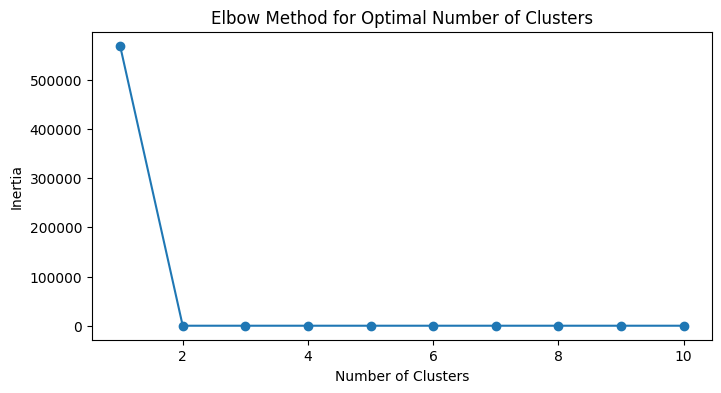

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
optimal_clusters = 2

In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(df.groupby('Cluster').describe())

           Centre                                                           \
            count        mean         std  min    25%    50%    75%    max   
Cluster                                                                      
0        284640.0  467.153457  272.307304  0.0  229.0  463.5  698.0  945.0   
1        284640.0  467.153457  272.307304  0.0  229.0  463.5  698.0  945.0   

           Gender       ... Wage(INR)              Year               \
            count mean  ...       75%     max     count         mean   
Cluster                 ...                                            
0        284640.0  0.0  ...     350.0  1345.0  284640.0  2015.229216   
1        284640.0  1.0  ...     250.0  3500.0  284640.0  2015.229216   

                                                           
              std     min     25%     50%     75%     max  
Cluster                                                    
0        2.850967  2010.0  2012.0  2016.0  2018.0  2019.0  
1       

In [ ]:
cluster_summary = df.groupby('Cluster').agg({'Gender': 'mean','Wage(INR)': 'mean'}).sort_values(by='Wage(INR)', ascending=False)

print(cluster_summary)

         Gender   Wage(INR)
Cluster                    
0           0.0  275.947252
1           1.0  200.620254


In [ ]:
# labour category
from sklearn.preprocessing import LabelEncoder
X = df[['Labour Category']]
y = df[['Wage(INR)']]

for col in X:
    encoder = LabelEncoder()
    encoder.fit(X[col].drop_duplicates())
    X[col] = encoder.transform(X[col])

<ipython-input-17-a50633283a0d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.transform(X[col])


In [ ]:
X.head()

,Labour Category
0,0
1,0
2,1
3,1
4,3


In [ ]:
inertia = []
num_clusters = range(1, 11)

In [ ]:
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-3809129529d4>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(data_scaled)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_ini

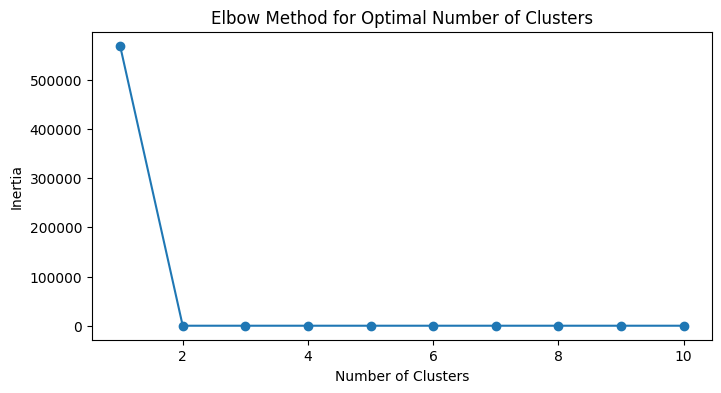

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [ ]:
cluster_summary = df.groupby('Cluster').agg({'Labour Category': 'mean','Wage(INR)': 'mean'}).sort_values(by='Wage(INR)', ascending=False)

print(cluster_summary)

         Labour Category   Wage(INR)
Cluster                             
0               1.286046  275.947252
1               1.286046  200.620254


In [ ]:
# STATE
from sklearn.preprocessing import LabelEncoder
X = df[['State']]
y = df[['Wage(INR)']]

for col in X:
    encoder = LabelEncoder()
    encoder.fit(X[col].drop_duplicates())
    X[col] = encoder.transform(X[col])

<ipython-input-26-6ab85e47090d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.transform(X[col])


In [ ]:
inertia = []
num_clusters = range(1, 11)

In [ ]:
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-3809129529d4>:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(data_scaled)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_ini

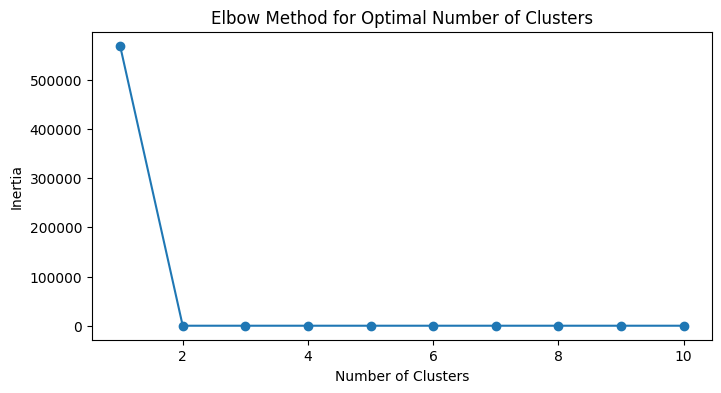

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [ ]:
cluster_summary = df.groupby('Cluster').agg({'Labour Category': 'mean','Wage(INR)': 'mean'}).sort_values(by='Wage(INR)', ascending=False)

print(cluster_summary)

         Labour Category   Wage(INR)
Cluster                             
0               1.286046  275.947252
1               1.286046  200.620254
